Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation such
as
f (x) = min(x+((a/128)e^(−((x−128)^2)/(2(σ^2)))), 255)
to the saturation plane, where x is the input intensity, a ∈ [0,1] and σ = 70. [10]
(a) Split the image into hue, saturation, and value planes.


(b) Apply the aforementioned intensity transformation to the saturation plane.


(c) Adjust a to get a visually pleasing output. Report the value of a.


In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in BGR color space
image_bgr = cv.imread('images/spider.png', cv.IMREAD_COLOR)

# Convert the BGR image to HSV color space
image_hsv = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Extract the saturation (S) plane
saturation_plane = image_hsv[:, :, 1]

# Define the intensity transformation function
def intensity_transform(x, a, sigma=70):
    # Apply an intensity transformation to enhance vibrance
    transformed_x = np.clip(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 0, 255)
    return transformed_x

# Apply the intensity transform function to enhance saturation
transformed_saturation_plane = intensity_transform(saturation_plane, 0.6)

# Create a copy of the HSV image for modification
image_copy = image_hsv.copy()

(d) Recombine the three planes.


In [31]:
# Recombine the planes with the transformed saturation
image_copy[:, :, 1] = transformed_saturation_plane

# Convert the HSV image back to BGR color space
original_image = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)
transformed_image = cv.cvtColor(image_copy, cv.COLOR_HSV2RGB)

(e) Display the original image, vibrance-enhanced image, and the intensity transformation.

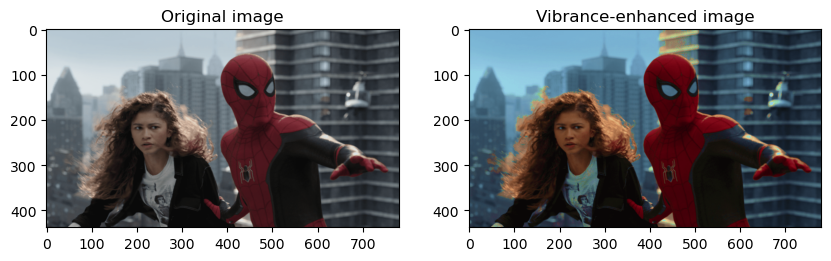

In [34]:
# Display the original and vibrance-enhanced images side by side
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(original_image)
axarr[0].set_title('Original image')
axarr[1].imshow(transformed_image)
axarr[1].set_title('Vibrance-enhanced image')
plt.savefig('Q4Vibrance-enhanced image.png')

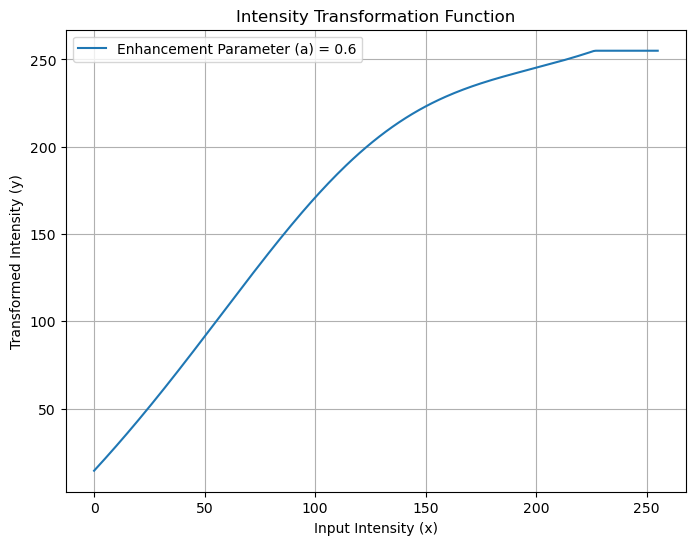

In [36]:

# Generate input values (x values) from 0 to 255
x_values = np.arange(256)

# Set the enhancement parameter 'a' (you can adjust this)
enhancement_parameter = 0.6

# Compute the transformed values (y values) using the intensity_transform function
y_values = intensity_transform(x_values, enhancement_parameter)

# Create a plot to visualize the transformation
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=f'Enhancement Parameter (a) = {enhancement_parameter}')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Transformed Intensity (y)')
plt.savefig('Q4Intensity Transformation Function.png')
plt.legend()
plt.grid(True)
plt.show()